## 1. Overview
In this course, we first explored how to create and customize a range of compelling data plots using the high-level functions that Seaborn, Matplotlib, and Pandas provide. Since these high-level functions all use Matplotlib underneath, we then dove into the internals of the Matplotlib library. In this guided project, you'll practice recreating some of the plots using Matplotlib that Seaborn and Pandas allow you to generate using high-level functions. This deliberate practice will help prepare you for creating new kinds of plots in the future that these libraries don't provide.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We'll continue to work with the dataset from the American Community Survey on job outcomes for recent college graduates. You can read about how the dataset was compiled on FiveThirtyEight's Github repo.

Here are some of the columns in the dataset:

Rank - Rank by median earnings
Major_code - Major code
Major - Major description
Major_category - Category of major
Total - Total number of people with major
Sample_size - Sample size (unweighted) of full-time
Men - Male graduates
Women - Female graduates
ShareWomen - Women as share of total
Employed - Number employed
Before we start creating data visualizations, let's import the libraries we need and remove rows contain null values.


In [3]:
recent_grads = pd.read_csv("/Users/kaitfolweiler/Downloads/Guided Project- Customizing Data Visualizations/recent-grads.csv")

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Determine if there are any rows with missing values and drop those rows. While Pandas can handle NaN values well, Matplotlib does not. Since we only have 173 rows, let's make sure only a handful (at max) are problematic.

Use the shape attribute to look up the number of rows in the DataFrame. recent_grads.shape[0] returns the number of rows.
Use the DataFrame method dropna() to return a new DataFrame with rows containing NaN values dropped. Documentation for dropna().
Compare the row counts of both DataFrames and you'll notice that only 1 row (of 173 rows) was removed.


In [5]:
print(recent_grads.shape[1]) #columns
recent_grads.shape[0] #rows

21


173

In [6]:
recent_grads_noNA = recent_grads.dropna()
recent_grads_noNA.shape[0]

172

## Scatter matrix: Part 1
Both Pandas and Seaborn have high-level functions to create a scatter matrix, a kind of plot that makes it easy to explore relationships between combinations of columns. The Pandas implementation can be called using the scatter_matrix() method. Now that we have some familiarity with Matplotlib's internals, we'll be able to recreate the below scatter matrix using Matplotlib.

Plot

The scatter matrix was created using the scatter_matrix() function, which you can read more about on the Pandas documentation.:

from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[["ShareWomen","Unemployment_rate"]])
First, let's create the subplots we need and layout the data. In the next step, we'll focus on styling and customizing how the plot actually looks.


Instructions
First, we need to create a Figure instance and create 4 Axes instances, corresponding to each subplot.

Create a Figure instance by calling the figure() method on the matplotlib.pyplot object.
Experiment with the size of the total plot area using the figsize parameter -- e.g. fig = plt.figure(figsize=(8,8)) sets the plotting area to 8 inches by 8 inches.
Use the Figure method add_subplot() to add 4 subplots on a 2 by 2 layout and assign each plot's returned Axes instance to different variables. Name the variables after the subplot's position so you know which variable refers to which subplot. Documentation for add_subplot().
Now that we have 4 Axes instances, corresponding to the 4 subplots in the scatter matrix, we can generate the graphs that belong on each subplot.

In the top-left plot (subplot: 1), plot a histogram of the values in the ShareWomen column. Documentation for hist().
In the top-right plot (subplot: 2), plot a scatter plot with ShareWomen as the y-axis and Unemployment_rate as the x-axis. Documentation for scatter().
In the bottom-left plot (subplot: 3), plot a scatter plot with Unemployment_rate as the y-axis and ShareWomen as the x-axis. Documentation for scatter().
In the bottom-right plot (subplot: 4), plot a histogram of the values in the Unemployment_rate column. Documentation for hist().
Here's how the plot should look like so far:


  

 


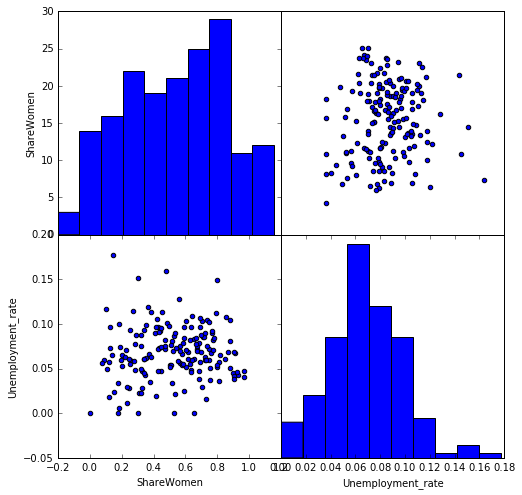

In [7]:
fig = plt.figure(figsize=(8,8))
axtopLeft = fig.add_subplot(2,2,1)
axtopRight = fig.add_subplot(2,2,2)
axbottomLeft = fig.add_subplot(2,2,3)
axbottomRight = fig.add_subplot(2,2,4)

axtopLeft.hist(recent_grads_noNA["ShareWomen"])
axtopRight.scatter(recent_grads_noNA["Unemployment_rate"], recent_grads_noNA["ShareWomen"])
axbottomLeft.scatter(recent_grads_noNA["ShareWomen"], recent_grads_noNA["Unemployment_rate"])
axbottomRight.hist(recent_grads_noNA["Unemployment_rate"])

axtopLeft.get_xaxis().set_visible(False)
axtopRight.get_xaxis().set_visible(False)
axtopRight.get_yaxis().set_visible(False)
axbottomRight.get_yaxis().set_visible(False)
axtopLeft.set_ylabel("ShareWomen")
axbottomLeft.set_xlabel("ShareWomen")
axbottomLeft.set_ylabel("Unemployment_rate")
axbottomRight.set_xlabel("Unemployment_rate")

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


Now let's tweak the appearance to resemble the scatter matrix.

To tweak how the axis ticks look, you need to grab a subplot's XAxis or YAxis instance and call specific methods. Use the Axes methods get_xaxis() and get_yaxis() to return a subplot's XAxis instance and YAxis instance. You can then either assign the instances to variables and call methods on the variables or skip the assignment and chain the method directly. ax1_rg.get_yaxis().tick_left() causes the y-axis ticks to be displayed on the left side for that subplot.

To adjust the space between subplots, you can use the method subplots_adjust() and set the wspace and hspace parameters.


Instructions
Hide the x-axis ticks for the 2 subplots on the top row.

Use xaxis.set_visible(False) on an Axes instance to hide that subplot's x-axis ticks and the x-axis label. Documentation.
Assign the column names as the x-axis and y-axis labels. Use the Axes methods set_xlabel() and set_ylabel() to set the subplot's x-axis and y-axis labels.

For subplot 1, set the y-axis label to "ShareWomen".
For subplot 3, set the x-axis label to "ShareWomen" and the y-axis label to "Unemployment_rate".
For subplot 4, set the x-axis label to "Unemployment_rate".
Remove the spacing between subplots to match the scatter matrix Pandas generated.

Use the Figure method subplots_adjust() to remove the horizontal and vertical spacing between subplots. Read about the parameters you need to tweak on the documentation.
Here's how the plot should look like so far:



## Scatter matrix: part 3
The last remaining piece is to customize the x-axis and y-axis ticks displayed for subplots 1, 3, and 4. Currently, the x-axis ticks overlap for plots 3 and 4 and the y-axis ticks overlap for plots 1 and 3. We need to manually set the ticks for these 3 plots so there's no overlap.

Lastly, to match the scatter matrix generated by the Pandas scatter_matrix() method, we also need to rotate the x-axis ticks by 90 degrees:

Plot


Instructions
Use the Axes methods set_xlim() and set_ylim to set the x-axis and y-axis data limits. Recall that these methods take in 2 parameters, one for the bottom limit and one for the upper limit. Documentation.

For subplot 1, set the x-axis data limit to range from 0 to 30.
For subplot 2, set the x-axis data limit to range from 0.0 to 1.0.
For subplot 3, set the x-axis data limit to range from 0.0 to 1.0.
For subplot 3, set the y-axis data limit to range from 0.0 to 0.20.
For subplot 4, set the x-axis data limit to range from 0.0 to 0.20.
Use the Axes methods set_xticklabels() and set_yticklabels() to set the x-axis and y-axis tick labels. Both these methods take in a list of numeric values and sets those values as the ticks. You can use the rotation parameter to set the rotation to 90 degrees for the x-axis ticks.

For subplot 1, use set_yticklabels([0, 5, 10, 15, 20, 25, 30]) to specify the y-axis ticks.
For subplot 3, use set_yticklabels([0.00, 0.05, 0.10, 0.15]) to specify the values for the y-axis ticks.
For subplot 3, use set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90) to specify the values for the x-axis ticks and rotate them 90 degrees.
For subplot 4, use set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90) to specify the values for the x-axis ticks and to rotate them 90 degrees.


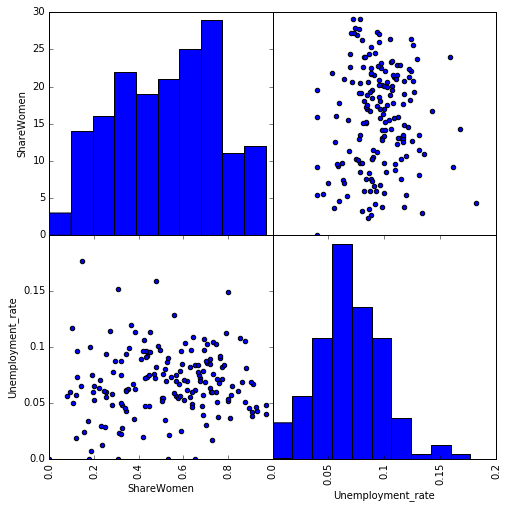

In [8]:
fig = plt.figure(figsize=(8,8))
axtopLeft = fig.add_subplot(2,2,1)
axtopRight = fig.add_subplot(2,2,2)
axbottomLeft = fig.add_subplot(2,2,3)
axbottomRight = fig.add_subplot(2,2,4)

axtopLeft.hist(recent_grads_noNA["ShareWomen"])
axtopRight.scatter(recent_grads_noNA["Unemployment_rate"], recent_grads_noNA["ShareWomen"])
axbottomLeft.scatter(recent_grads_noNA["ShareWomen"], recent_grads_noNA["Unemployment_rate"])
axbottomRight.hist(recent_grads_noNA["Unemployment_rate"])

axtopLeft.get_xaxis().set_visible(False)
axtopRight.get_xaxis().set_visible(False)
axtopRight.get_yaxis().set_visible(False)
axbottomRight.get_yaxis().set_visible(False)
axtopLeft.set_ylabel("ShareWomen")
axbottomLeft.set_xlabel("ShareWomen")
axbottomLeft.set_ylabel("Unemployment_rate")
axbottomRight.set_xlabel("Unemployment_rate")
axtopLeft.set_ylim(0,30)
axtopRight.set_ylim(0.0, 1.0)
axbottomLeft.set_xlim(0.0, 1.0)
axbottomLeft.set_ylim(0.0, 0.20)
axbottomRight.set_xlim(0.0,0.20)
axtopLeft.set_yticklabels([0,5,10,15,20,25,30])
axbottomLeft.set_xticklabels([0.0,0.2,0.4,0.6,0.8], rotation=90)
axbottomLeft.set_yticklabels([0.00,0.05,0.10,0.15])
axbottomRight.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Grouped bar plot, part 1
6 / 8 
Since the dataset on recent college graduates contains information on the number of males and females included in the study, you can create a grouped bar plot to compare the gender ratios across majors. A grouped bar plot is a type of data visualization that enable you to easily compare groups of related bars together. A grouped bar plot would allow us to visually understand the gender imbalance for each major since the bars representing the proportion of men and the proportion of women for each major would be grouped together.

Pandas allows you to easily create a grouped bar plot on by using the plot() method. You need to first filter the DataFrame down to the columns you want visualized as bars and set the type parameter to "bar" when calling the plot() method. Running the following code creates a grouped bar plot of the proportion of males and proportion of females for each Arts major:

arts = recent_grads[recent_grads["Major_category"] == "Arts"]
arts.set_index("Major", inplace=True)
arts[["ShareMen", "ShareWomen"]].plot(kind="bar")
After filtering the DataFrame down to only the majors categorized as Arts, we set the DataFrame's index to the Major column so Pandas uses the major names as the x-axis labels. Here's how that plot looks like:

Plot

The blue bars represent the proportion of male students while the green bars represent the proportion of female students. This plot allows you to easily see the gender balance for each of the majors in the Arts category. In this step, we'll prepare the DataFrame and generate the bars for just the male proportions and avoid any thorough styling for now.


Instructions
While we have a ShareWomen column for the proportion of women in that major, we need a column that describes the proportion of men.

Divide the Men column by the Total column and assign it to a new column in the DataFrame called ShareMen.
Return a DataFrame containing just the arts majors (where Major_category is "Arts") and assign it to a variable.

Create a Figure instance and add a single subplot.

Use plt.figure() to create a Figure instance and assign the returned object to a variable.
Experiment with the size of the total plotting area using the figsize parameter - e.g. fig = plt.figure(figsize=(8,8)) sets the plotting area to 8 inches by 8 inches.
Create a single subplot using the add_subplot() method and assign the returned Axes instance to a variable.
Import NumPy and use the NumPy function arange() to generate a list of integer values, from 0 to n-1, for each major (n majors total). Documentation for arange().

Assign to the variable locs. We'll use this list for the placement of the bars in the bar plot.
Since there are 8 majors, this list should be: [0,1,2,3,4,5,6,7].
Use the Axes method bar() to generate the bars for the ShareMen column. Assign the returned object to bar_1. Documentation for bar().

Use the first parameter (left) to specify the x coordinates for the left sides of the bars.
Use the list of placement values locs for this parameter.
Use the second parameter (height) to specify the height of each of the bars.
The value for this parameter should be the list of values from the ShareMen column. Use the Series method tolist() to convert the column to a list.
Use the third parameter (width) to specify the width of each of the bars.
We'll use 0.35 to start but you can experiment with this value. We recommend setting this value to a variable so you can refer to it later.
Use the Axes method set_xticklabels() to assign the major names to the x-axis labels and rotate the labels by 90 degrees. Documentation for set_xticklabels()

Pass in the list of major names as the first parameter. Select the Major column from the DataFrame and use the Series method tolist() to convert to a list.
Set the rotation parameter to 90.
Here's how the plot should look like so far:

Plot



In [9]:
recent_grads_noNA['ShareMen'] = recent_grads_noNA["Men"] /recent_grads_noNA["Total"]

recent_grads_noNA.head()


/Users/kaitfolweiler/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
0,1,2419,PETROLEUM ENGINEERING,2339,2057,282,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.879436
1,2,2416,MINING AND MINERAL ENGINEERING,756,679,77,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.898148
2,3,2415,METALLURGICAL ENGINEERING,856,725,131,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.846963
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258,1123,135,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.892687
4,5,2405,CHEMICAL ENGINEERING,32260,21239,11021,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.658369


In [10]:
arts = recent_grads_noNA[recent_grads_noNA["Major_category"]=="Arts"]

In [11]:
import numpy as np
locs = np.arange(len(np.unique(arts["Major"])))

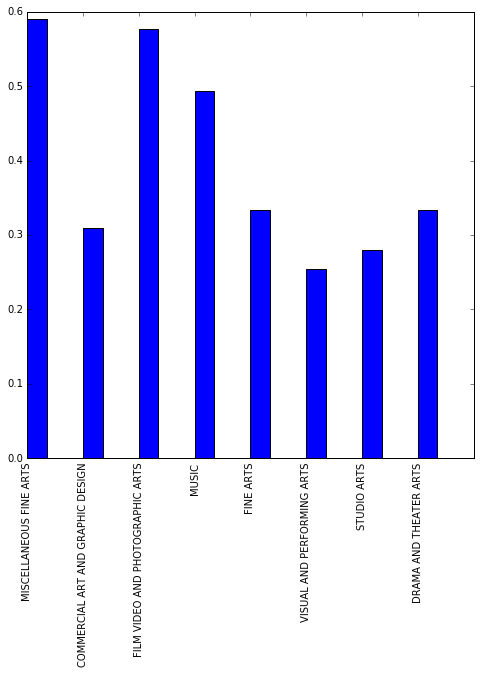

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xticklabels(list(arts["Major"]), rotation=90)
bar_1 = ax.bar(left=locs, height=list(arts["ShareMen"]), width=0.35)

plt.show()

## Grouped bar plot, part 2

In this step, we need to add the bars representing the proportion of women for each Arts major. To closer match the style of the Pandas grouped bar plot, let's add a legend describing the color corresponding to each column and enable the grid to to be displayed in the background. Lastly, let's adjust the x-axis labels so they align with the bars better.


Instructions

We need a list of placement values for the new bars that are offset (or the bars for ShareWomen will just overlap the bars for ShareMen).

Offset the values in locs by the width of each bar (0.35) by adding 0.35 to each value in locs. Assign the new list to offset_locs.
Generate the bars for the ShareWomen column using the Axes method bar(). Assign the returned object to bar_2. Documentation for bar()

For the first parameter (left), use offset_locs. This will place the bars for ShareWomen right next to the bars for ShareMen.
For the second parameter (height), use the values from the ShareWomen column.
For the third parameter (width), use the value 0.35 that we've been using for the bar widths.
Use the parameter (color) to specify that we want the bars to be colored "green".
Align the x-axis labels better with the grouped bars using the Axes method set_xticks(). Documentation for set_xticks()

Pass in the list offset_locs to set_xticks() to align the x-axis labels with the left edge of the bars for ShareWomen.
Create a legend that specifies the color for each column's bars using the Plot method legend(). Documentation for legend()

Read about how to create a legend in Matplotlib here.
Use plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left") to create the legend that matches the one Pandas generated.
Display the background grid using the Plot method grid(). Documentation for grid()

Here's how the completed plot should look like:


  

 


In [13]:
offset_locs = locs + 0.35

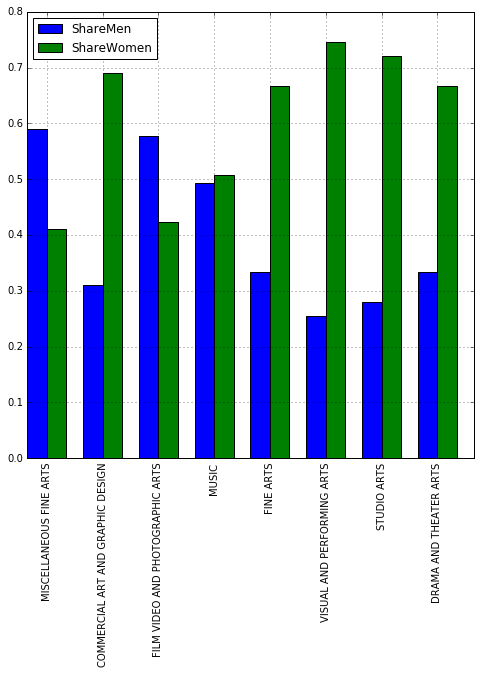

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xticklabels(list(arts["Major"]), rotation=90)
bar_1 = ax.bar(left=locs, height=list(arts["ShareMen"]), width=0.35)
bar_2 = ax.bar(left=offset_locs, height=list(arts["ShareWomen"]),width=0.35, color="green")
ax.set_xticks(offset_locs)

plt.legend((bar_1,bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()
plt.show()